In [9]:
import pandas as pd
from tqdm import tqdm_notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast


In [2]:
json_file = "./geoEurope/geoEurope_202206{}{}.json"

In [3]:
json_names = []
for day in range(1,31):
    for hour in range(0,24):
        if day < 10:
            day1 = '0'+ str(day)
        else:
            day1 = str(day)
        if hour < 10:
            hour1 = '0' + str(hour)
        else:
            hour1 = str(hour)
            
        name = json_file.format(day1,hour1)
        json_names.append(name)

In [ ]:
bounding_boxes = []
for i in tqdm_notebook(range(len(json_names)),desc='Reading：'):
    json_f = json_names[i]
    #print("Now reading file:", json_f)
    result_json = []
    with open(json_f) as f:
        lines = f.readlines()
        for line in lines:
            try:
                result = json.loads(line)
                result_json.append(result)
            except Exception:
                print("Meet an error.")
                pass
                

    for record in result_json:
        try:
            if record['place']:
                bounding_boxes.append(record['place']['bounding_box']['coordinates'])
            
        except Exception:
            print("Meet an error.")
            pass

In [15]:
bounding_boxes[100][0]

[22.355901, 41.235864]

In [ ]:
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))

In [27]:
from shapely.geometry import Polygon
point = bounding_boxes[1][0]
lat_point_list = [x[1] for x in bounding_boxes[100][0]]
lon_point_list = [x[0] for x in bounding_boxes[100][0]]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))

In [28]:
from math import sqrt
import geopy.distance
def to_square(polygon):
    minx, miny, maxx, maxy = polygon.bounds
    # get the diagonal
    coords_1 = (maxx, maxy)
    coords_2 = (minx, miny)
    diagonal = geopy.distance.geodesic(coords_1, coords_2).km
    return diagonal

In [29]:
to_square(polygon_geom)

754.459111150671

In [ ]:
diagonals = []
for i in tqdm_notebook(range(len(bounding_boxes)),desc='Reading：'):
    points = bounding_boxes[i][0]
    lat_point_list = [x[1] for x in points]
    lon_point_list = [x[0] for x in points]
    maxx = max(lat_point_list)
    minx = min(lat_point_list)
    maxy = max(lon_point_list)
    miny = min(lon_point_list)
    try:
        coords_1 = (maxx, maxy)
        coords_2 = (minx, miny)
        diagonal = geopy.distance.geodesic(coords_1, coords_2).km
        diagonals.append(diagonal)
    except Exception:
        pass
    

In [41]:
limit_diagonals = []
for x in diagonals:
    if x<500:
        limit_diagonals.append(x)

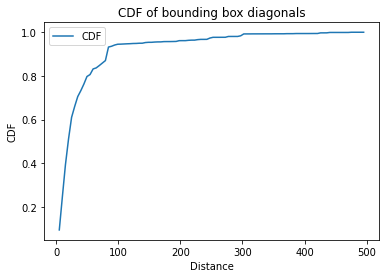

In [42]:
count, bins_count = np.histogram(limit_diagonals, bins=100)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.title("CDF of bounding box diagonals")
plt.xlabel('Distance')
plt.ylabel('CDF')
plt.legend()
plt.show()